# **Project Name**    - Bike Sharing Demand Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Vyankat B Hambarde (Individual)

# **Project Summary -**

Bike Seoul, a bike sharing service in Seoul, South Korea, plays a vital role in promoting sustainable transportation and easing traffic congestion. By enabling residents and visitors to rent bikes from diverse stations across the city and return them at any station, Bike Seoul offers a convenient and eco-friendly travel option. As demand for bike rentals in Seoul has risen in recent years, there is a growing need for more efficient bike sharing operations. Accurate prediction of bike demand becomes essential to optimize fleet management, ensure bike availability at high-demand spots, and minimize wastage and costs.

The central objective of this initiative involves the development of a proficient machine learning model that can precisely forecast bike rental demands in Seoul. This prediction relies on historical data and pertinent variables such as weather conditions, time of day, and public holidays. The project employed regression analysis techniques to model the historical bike demand information. This involved training the model on a comprehensive dataset encompassing past bike rental details, along with correlated weather and temporal information. Evaluation metrics like mean squared error and r-squared values were used to assess and test the model's performance. The primary aim was to achieve a minimum accuracy of 85% in bike demand predictions, thereby empowering the city's bike sharing providers to streamline fleet operations, promptly adapt to demand fluctuations, and enhance overall responsiveness. 

Various regression algorithms were explored, including linear regression, random forest, decision tree, gradient boosting, and Xtreme gradient boosting. Rigorous techniques like hyperparameter tuning and cross-validation were applied to enhance the model's precision. Ultimately, the Xtreme gradient boosting algorithm emerged as the chosen approach due to its impressive accuracy rates of approximately 93% and 90% on training and test data respectively.

This endeavor yielded not only invaluable insights into bike demand trends within Seoul but also showcased the pragmatic utility of machine learning in addressing real-world challenges. The implications of these findings could potentially extend to other cities with analogous bike sharing systems, thereby fostering enhanced services for bike users and more sustainable urban transportation systems.

# **GitHub Link -**

https://github.com/vyankath/Capstone_REG_BSD

# **Problem Statement**


Rental bicycles have been introduced in numerous urban centers to elevate the convenience of mobility. Ensuring the timely availability and accessibility of these rental bikes is pivotal in minimizing wait times. Consequently, establishing a consistent inventory of rental bikes within the city emerges as a significant focal point. The key challenge lies in forecasting the requisite bike quantities for each hour to maintain a steady provision of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# Import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

### Dataset Loading

In [2]:
# Load Dataset

In [3]:
df = pd.read_csv('SeoulBikeData.csv', encoding='unicode_escape')

In [4]:
# Load Dataset from github repository
"""url = 'https://raw.githubusercontent.com/yahya-ansariii/BikeSharingDemandRegression/master/SeoulBikeData.csv'
df = pd.read_csv(url, encoding='unicode_escape')"""

"url = 'https://raw.githubusercontent.com/yahya-ansariii/BikeSharingDemandRegression/master/SeoulBikeData.csv'\ndf = pd.read_csv(url, encoding='unicode_escape')"

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f"No of rows in dataset asre {df.shape[0]} and {df.shape[1]} are columns")

No of rows in dataset asre 8760 and 14 are columns


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [9]:
for col in df.columns:
    print(f"{col}:- {df[col].dtype}")

Date:- object
Rented Bike Count:- int64
Hour:- int64
Temperature(°C):- float64
Humidity(%):- int64
Wind speed (m/s):- float64
Visibility (10m):- int64
Dew point temperature(°C):- float64
Solar Radiation (MJ/m2):- float64
Rainfall(mm):- float64
Snowfall (cm):- float64
Seasons:- object
Holiday:- object
Functioning Day:- object


#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isna().mean()*100

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

<AxesSubplot:>

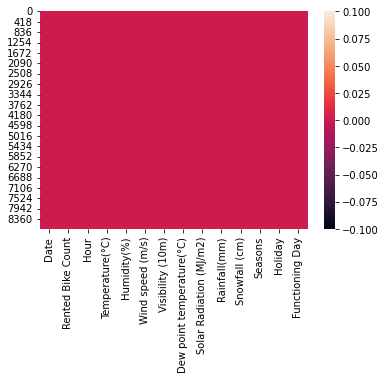

In [12]:
# Visualizing the missing values
sns.heatmap(df.isna())

### What did you know about your dataset?

- The dataset comprises 14 feature columns, with "Rented Bike Count" serving as the dependent variable column.
- The dataset encompasses a total of 8,760 observations (rows).
- Notably, there are no instances of duplicate rows present within the dataset.
- Moreover, the dataset is entirely devoid of any missing values or occurrences of Null values.
- There are 6 float64, 4 int64, and  4 object data type columns in the dataset.

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [14]:
# Dataset Describe
df.describe().round()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.0,8760.0,8760.0,8760.0,8760.0,8760.0,8760.0,8760.0,8760.0,8760.0
mean,705.0,12.0,13.0,58.0,2.0,1437.0,4.0,1.0,0.0,0.0
std,645.0,7.0,12.0,20.0,1.0,608.0,13.0,1.0,1.0,0.0
min,0.0,0.0,-18.0,0.0,0.0,27.0,-31.0,0.0,0.0,0.0
25%,191.0,6.0,4.0,42.0,1.0,940.0,-5.0,0.0,0.0,0.0
50%,504.0,12.0,14.0,57.0,2.0,1698.0,5.0,0.0,0.0,0.0
75%,1065.0,17.0,22.0,74.0,2.0,2000.0,15.0,1.0,0.0,0.0
max,3556.0,23.0,39.0,98.0,7.0,2000.0,27.0,4.0,35.0,9.0


### Variables Description 

**The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.**

**Attribute Information:**

- Date :- The date of the day, formating in DD/MM/YYYY
- Rented Bike Count :- Number of rented bikes per hour which our dependent variable and we need to predict that.
- Hour :- The hour of the day, starting from 0-23 it's in a digital time format.
- Temperature(°C) :- Temperature in Celsius.
- Humidity(%) :- Humidity in the air in %.
- Wind speed (m/s) :- Speed of the wind in m/s.
- Visibility (10m) :- Visibility in m.
- Dew point temperature(°C) :- Temperature at the beggining of the day.
- Solar Radiation (MJ/m2) :- Sun contribution.
- Rainfall(mm) :- Amount of raining in mm.
- Snowfall (cm) :- Amount of snowing in cm.
- Seasons :- Season of the year.
- Holiday :- If the day is holiday period or not.
- Functioning Day :- If the day is a Functioning Day or not.

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
for col in df.columns:
  print(f"Unique values in a {col} are {df[col].nunique()}")

Unique values in a Date are 365
Unique values in a Rented Bike Count are 2166
Unique values in a Hour are 24
Unique values in a Temperature(°C) are 546
Unique values in a Humidity(%) are 90
Unique values in a Wind speed (m/s) are 65
Unique values in a Visibility (10m) are 1789
Unique values in a Dew point temperature(°C) are 556
Unique values in a Solar Radiation (MJ/m2) are 345
Unique values in a Rainfall(mm) are 61
Unique values in a Snowfall (cm) are 51
Unique values in a Seasons are 4
Unique values in a Holiday are 2
Unique values in a Functioning Day are 2


## 3. ***Data Wrangling***

Some names of the variables are not relevant and not easy to understand. Some data may have data entry errors, and some variables may need data type conversion and we need to fix this issue in the data and this is reffered as the "Data Wrangling" process.

This need to be done before EDA as it will help to perform EDA effectively.

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
df_copy = df.copy() # Before doing any data wrangling lets create copy of the dataset

In [17]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [18]:
df.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour','Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility','Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall','Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},inplace=True)
                    # renaming the columns in to lower case some are with units so removing that too.

In [19]:
# Dealing with date column as in dataset it has object dtype so converting it into numerical.

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')   # Converting the 'Date' column to datetime and in this format '%d/%m/%Y' to extract d/m/y

df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year                              # Extract day, month, and year into separate columns

df['weekday'] = df['date'].dt.weekday                        # getting the weekday from date column
df['day_type'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)   # Maping the day of the week to weekend = 1 or  Weekday =0

df.drop(columns=['date'], inplace=True)
df

,rented_bike_count,hour,temperature,humidity,wind_speed,visibility,dew_point_temp,solar_radiation,rainfall,snowfall,seasons,holiday,func_day,day,month,year,weekday,day_type
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,30,11,2018,4,0


In [20]:
for col in df.columns:
  print(f"Unique values in a {col} are {df[col].nunique()}")

Unique values in a rented_bike_count are 2166
Unique values in a hour are 24
Unique values in a temperature are 546
Unique values in a humidity are 90
Unique values in a wind_speed are 65
Unique values in a visibility are 1789
Unique values in a dew_point_temp are 556
Unique values in a solar_radiation are 345
Unique values in a rainfall are 61
Unique values in a snowfall are 51
Unique values in a seasons are 4
Unique values in a holiday are 2
Unique values in a func_day are 2
Unique values in a day are 31
Unique values in a month are 12
Unique values in a year are 2
Unique values in a weekday are 7
Unique values in a day_type are 2


In [23]:
df['day_type'].value_counts()

0    6264
1    2496
Name: day_type, dtype: int64

In [24]:
cat_col = [i for i in df.columns if df[i].nunique()<=5]
print(f"Categorical columns are :- {cat_col}")
cont_col = [i for i in df.columns if i not in cat_col]
print(f"Continious columns are :- {cont_col}")

Categorical columns are :- ['seasons', 'holiday', 'func_day', 'year', 'day_type']
Continious columns are :- ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'day', 'month', 'weekday']


In [25]:
df.drop(columns=['year','day','weekday'],inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rented_bike_count  8760 non-null   int64  
 1   hour               8760 non-null   int64  
 2   temperature        8760 non-null   float64
 3   humidity           8760 non-null   int64  
 4   wind_speed         8760 non-null   float64
 5   visibility         8760 non-null   int64  
 6   dew_point_temp     8760 non-null   float64
 7   solar_radiation    8760 non-null   float64
 8   rainfall           8760 non-null   float64
 9   snowfall           8760 non-null   float64
 10  seasons            8760 non-null   object 
 11  holiday            8760 non-null   object 
 12  func_day           8760 non-null   object 
 13  month              8760 non-null   int64  
 14  day_type           8760 non-null   int64  
dtypes: float64(6), int64(6), object(3)
memory usage: 1.0+ MB


In [32]:
encoding_col = []
for col in df.columns:
    if df[col].dtype == "object":
        encoding_col.append(col)
encoding_col

['seasons', 'holiday', 'func_day']

In [35]:
df['seasons'].value_counts().to_dict()

{'Spring': 2208, 'Summer': 2208, 'Autumn': 2184, 'Winter': 2160}

In [39]:
df['seasons'].replace({'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4},inplace=True) # 'Spring': 1, 'Summer': 2, 'Autumn': 3, 'Winter': 4

In [36]:
df['holiday'].value_counts().to_dict()

{'No Holiday': 8328, 'Holiday': 432}

In [40]:
df['holiday'].replace({'No Holiday': 0, 'Holiday': 1},inplace=True) # {'No Holiday': 0, 'Holiday': 1}

In [37]:
df['func_day'].value_counts().to_dict()

{'Yes': 8465, 'No': 295}

In [41]:
df['func_day'].replace({'Yes': 1, 'No': 0},inplace=True) # {'Yes': 1, 'No': 0}

### What all manipulations have you done and insights you found?

- Renamed the columns in to lower case, some columns were with units attached so removed that.

**This is about Date Column Transformation**

- The "date" column is transformed into three distinct columns: "year," "month," and "day."
- The "year" column within our dataset holds two unique values, encompassing data from December 2017 to November 2018, since we treat this interval as a single year, the "year" column is superfluous and can be eliminated.
- As for the "day" column, it provides data about each day of the month. However, for our specific analysis, the focus shifts to categorizing days as weekdays or weekends, alongside we created weekday to map the weekend and weekdy so weekday and day  column unnecessary and thus it can be dropped.

- Separated columns into continiouse and categorical on the basis of valuecounts taking threshold as 5.

- Converted all columns into float and int

- 'seasons', 'holiday', 'func_day' these columns are with ordinal value so replaced with numbers. 'Spring'as 1, 'Summer'as 2, 'Autumn'as 3, 'Winter'as 4 in season column, 'No Holiday'as 0, 'Holiday'as 1 in Holiday column and 'Yes'as 1, 'No' as 0 in functional day.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***